In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import datetime
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns

from mpl_toolkits.basemap import Basemap


# Load data

Datast: https://data.cityofnewyork.us/City-Government/NYC-Permitted-Event-Information-Historical/bkfu-528j/data

In [6]:
apr14 = pd.read_csv("data/uber-raw-data-apr14.csv")
may14 = pd.read_csv("data/uber-raw-data-may14.csv")
jun14 = pd.read_csv("data/uber-raw-data-jun14.csv")
jul14 = pd.read_csv("data/uber-raw-data-jul14.csv")
aug14 = pd.read_csv("data/uber-raw-data-aug14.csv")
sep14 = pd.read_csv("data/uber-raw-data-sep14.csv")

rides14 = apr14.append([may14, jun14, jul14, aug14, sep14], ignore_index=True)

print(rides14.shape)
rides14.head()

(4534327, 4)


/tmp/ipykernel_2032148/3295561386.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rides14 = apr14.append([may14, jun14, jul14, aug14, sep14], ignore_index=True)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Data Descriptions

In [7]:
rides14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


**There are 5 unique Base numbers. Their frequency proportions are shown below**

In [8]:
rides14.get('Base').value_counts(normalize = True)

B02617    0.321735
B02598    0.307237
B02682    0.267468
B02764    0.058200
B02512    0.045359
Name: Base, dtype: float64

**There are "hot spots" where there are several trips to the same/similar location**

In [9]:
location_counts = rides14.groupby('Lat')['Lon'].value_counts(dropna = True).sort_values()
location_counts

Lat      Lon     
39.6569  -74.2258       1
40.7435  -73.9560       1
         -73.9568       1
         -73.9573       1
         -73.9712       1
                     ... 
40.7741  -73.8726    1921
40.6449  -73.7822    1947
40.6448  -73.7820    2079
40.7685  -73.8625    2257
40.6448  -73.7819    2299
Name: Lon, Length: 574558, dtype: int64

# Preprocessing

**There is no missing data**

In [10]:
rides14.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

Split Date and Time in two different Columns:

In [11]:
#Rename the Date/Time Colomn
rides14 = rides14.rename(columns={'Date/Time': 'Date_time'})

#Convere the Date_time type into Datetime
rides14['Date_time'] = pd.to_datetime(rides14['Date_time'])

In [13]:
rides14.head()

,Date_time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [14]:
rides14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 138.4+ MB


# Visualizations

## Density of Pickups in NYC

In [286]:
#Get Longitude and Latitude of the rides
Longitudes = rides14['Lon'].values
Latitudes  = rides14['Lat'].values

In [50]:
#Set extremes of the plot
right = max(Longitudes)
left = min(Longitudes)
bottom = min(Latitudes)
top = max(Latitudes)

Some of the observations are outliers (they are far away from the rest). To zoom in the map a little bit, we will use the following extremes even though some points are excluded from the map:

In [186]:
top = 41.2
bottom = 40.5
left = -74.3
right = -73.4

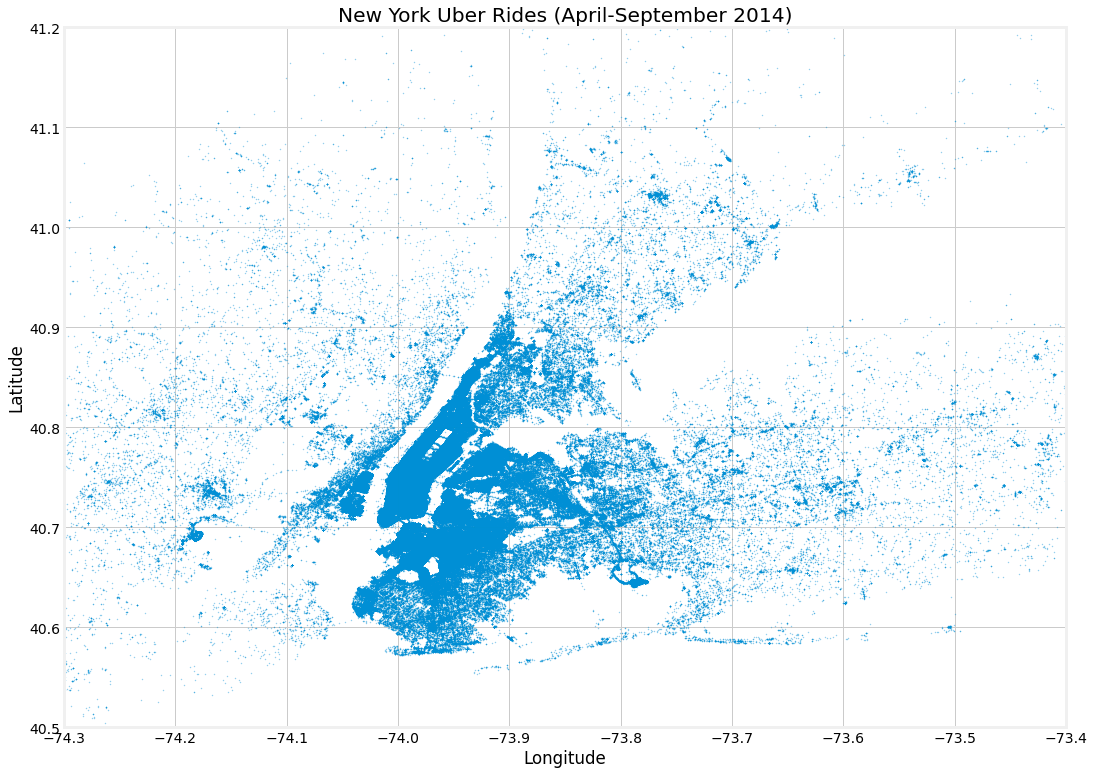

In [91]:
plt.figure(figsize=(16, 12)).patch.set_facecolor('white')
plt.axes().set_facecolor("white")
plt.plot(Longitudes, Latitudes, '.', ms=.8, alpha=.5)
plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Rides (April-September 2014)')
plt.style.use('fivethirtyeight')

plt.show()

## Number of pickups by Borough in NYC

In [152]:
locations = pd.read_csv("data/popular_loc_guess.csv")

In [183]:
boroughs = pd.read_csv("data/NY_data.csv")

In [193]:
airports = pd.read_csv("data/NY_airports.csv")

In [364]:
top = 41.1
bottom = 40.51
left = -74.23
right = -73.4

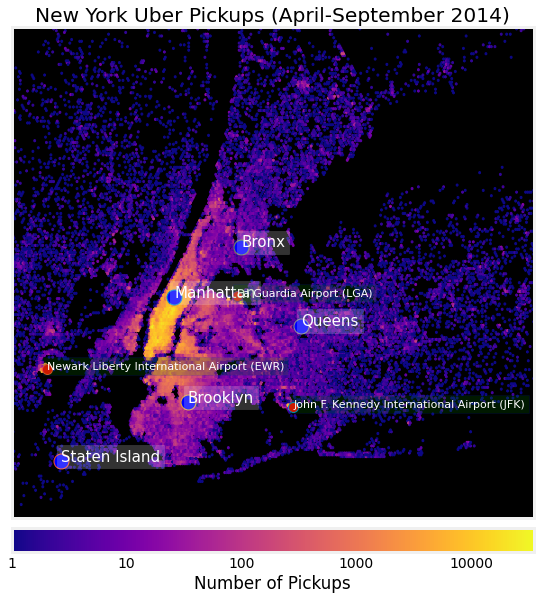

In [365]:
plt.figure(figsize=(13, 9)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")
plt.title('New York Uber Pickups (April-September 2014)')

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');

#Plot hotspots
# for i in range(0,len(locations)):
#     x,y = map(locations['Lon'][i], locations['Lat'][i])
#     plt.plot(x, y, 'ok', markersize=6)
#     plt.text(x, y,locations['Name'][i], fontsize=13, color="black").set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'));
#     i+=1
    
#Plot Boroughs
for i in range(0,len(boroughs)):
    x, y = map(boroughs['Lon'][i], boroughs['Lat'][i])
    plt.plot(x, y, marker='o', markerfacecolor='blue', markersize=15)
    plt.text(x, y, boroughs['Borough'][i], fontsize=15, color="white").set_bbox(dict(facecolor='white', alpha=0.2, edgecolor='white'));
    i+=1
    
#Plot hotspots: Airports
for i in range(0,len(airports)):
    x, y = map(airports['Long'][i], airports['Lat'][i])
    plt.plot(x, y, marker='o', markerfacecolor='red', markersize=10)
    plt.text(x, y, airports['Airport Name'][i], fontsize=11, color="white").set_bbox(dict(facecolor='green', alpha=0.2, edgecolor='BLUE'));
    i+=1

## Filter by Borough

In [270]:
locations_all = pd.read_csv("data/count_boroughs.csv")

In [300]:
locations_m = locations_all[locations_all['Borough'] == 1]
locations_m = locations_m.sort_values(by=['Ride.Count'], ascending=False)[0:15].reset_index()

In [301]:
locations_m

,index,Lat,Lon,Name,Borough,Ride.Count
0,5,40.7383,-74.0093,JANE HOTEL,1.0,16898
1,7,40.7407,-74.0079,THE STANDARD HOTEL HIGH LINE,1.0,15118
2,10,40.7391,-74.0049,CORPORAL JOHN A SERAVALLI PLAYGROUND,1.0,13727
3,12,40.7420,-73.9922,MANHATTAN VILLAGE ACADEMY HIGH SCHOOL,1.0,12984
4,13,40.7250,-73.9991,APPLE STORE SOHO,1.0,12024
5,14,40.7510,-73.9949,PENN STATION WEST END CONCOURSE,1.0,11990
6,15,40.7238,-73.9979,MUSEUM OF ICE CREAM,1.0,11757
7,16,40.7477,-74.0101,CHELSEA PIERS SKY RINK,1.0,11358
8,17,40.7450,-73.9909,PHILLIPS BETH ISRAEL SCHOOL OF NURSING,1.0,11322
9,18,40.7235,-74.0083,HUNTER COLLEGE MFA BUILDING,1.0,11276


In [306]:
locations_brook = locations_all[locations_all['Borough'] == 3]
locations_brook = locations_brook.sort_values(by=['Ride.Count'], ascending=False)[0:15].reset_index()

In [307]:
locations_brook

,index,Lat,Lon,Name,Borough,Ride.Count
0,4,40.7166,-73.9614,RADEGAST HALL & BIERGARTEN,3.0,18748
1,6,40.6973,-73.9318,FREEDOM TRIANGLE,3.0,15295
2,9,40.7209,-73.9556,MCCARREN HOTEL & POOL,3.0,13922
3,11,40.6685,-73.9791,METHODIST HOSPITAL WESLEY HOUSE,3.0,13233
4,20,40.6824,-74.0059,HUGH L CAREY TUNNEL VENTILATION BUILDING,3.0,10815
5,21,40.6640,-73.9906,5 AV OVER 27 X PROSPECT EP,3.0,10717
6,24,40.6987,-73.9179,HEISSER TRIANGLE,3.0,10288
7,25,40.7176,-73.9578,FORNINO RESTAURANT WILLIAMSBURG,3.0,10009
8,37,40.7256,-73.9445,STEWARD SQUARE,3.0,8794
9,38,40.7087,-73.9397,PS 196 TEN EYCK,3.0,8680


In [316]:
locations_bronx = locations_all[locations_all['Borough'] == 2]
locations_bronx = locations_bronx.sort_values(by=['Ride.Count'], ascending=False)[0:15].reset_index()
locations_bronx

,index,Lat,Lon,Name,Borough,Ride.Count
0,22,40.8702,-73.8458,GUN HILL ROAD OVER NYCT DYRE AVE,2.0,10717
1,130,40.9012,-73.9019,FIELDSTON RD OVER H HUDSON PKWY,2.0,5029
2,271,40.8276,-73.9260,TBPD DISTRICT 11,2.0,3469
3,362,40.8808,-73.9070,AMBER CHARTER SCHOOL II KINGSBRIDGE,2.0,3012
4,462,40.8544,-73.8854,BISHOP PERNICONE PLAZA,2.0,2548
5,641,40.8538,-73.8726,BRONX ZOO RIVER GATE,2.0,1961
6,656,40.8794,-73.8857,MARGARET J MACK TRIANGLE,2.0,1940
7,682,40.8462,-73.9089,BOARD OF ELECTIONS,2.0,1883
8,764,40.8268,-73.9227,GRAND CONCOURSE OVER E 161 ST,2.0,1724
9,866,40.8480,-73.8531,ST FRANCIS XAVIER CHURCH,2.0,1543


In [335]:
locations_queens = locations_all[locations_all['Borough'] == 4]
locations_queens = locations_queens.sort_values(by=['Ride.Count'], ascending=False)[0:15].reset_index()
locations_queens

,index,Lat,Lon,Name,Borough,Ride.Count
0,0,40.6489,-73.7841,JFK BUILDING 245C,4.0,93628
1,1,40.7745,-73.8728,LAGUARDIA AIRPORT TERMINAL B,4.0,50455
2,2,40.7706,-73.8648,LGA - US AIRWAYS TERMINAL,4.0,40466
3,8,40.7543,-73.7074,KATZ WOMENS HOSPITAL AT LONG ISLAND JEWISH MED...,4.0,14972
4,31,40.7657,-73.9232,ST DEMETRIOS SCHOOL,4.0,9175
5,46,40.7430,-73.9547,108 PRECINCT,4.0,8065
6,68,40.7273,-73.8536,DEVRY COLLEGE,4.0,6749
7,80,40.7690,-73.9108,STEINWAY ST OVER I-278 BQE WB,4.0,6413
8,89,40.6692,-73.8119,ST ANTHONY OF PADUA CHURCH,4.0,6118
9,124,40.7465,-73.9186,HOLY MOUNTAIN PRESCHOOL SKILLMAN AVE,4.0,5122


In [338]:
locations_staten = locations_all[locations_all['Borough'] == 5]
locations_staten = locations_staten.sort_values(by=['Ride.Count'], ascending=False)[0:15].reset_index()
locations_staten

,index,Lat,Lon,Name,Borough,Ride.Count
0,3,40.6434,-74.0720,SI FERRY TRML PEDESTRIAN,5.0,39370
1,692,40.5926,-74.1296,FDNY BOROUGH COMMAND,5.0,1866
2,845,40.5912,-74.0975,ST ANNS RC CHURCH,5.0,1583
3,964,40.6076,-74.0900,ST SYLVESTERS CHURCH,5.0,1407
4,1043,40.6148,-74.1765,HILTON GARDEN INN,5.0,1276
5,1071,40.5985,-74.1630,IMMANUEL LUTHERAN CHURCH,5.0,1229
6,1681,40.5482,-74.1482,CHRIST LUTHERAN CHURCH,5.0,541


## Hotspots in Manhattan

In [288]:
#New values to zoom in Manhattan
top_m = 40.79
bottom_m = 40.7
left_m = -74.05
right_m = -73.9

In [290]:
# locations_m = locations[(locations['Lat'] < top_m) & (locations['Lat'] > bottom_m)]  
# locations_m = locations_m[(locations_m['Lon'] > left_m) & (locations_m['Lon'] < right_m)].reset_index()

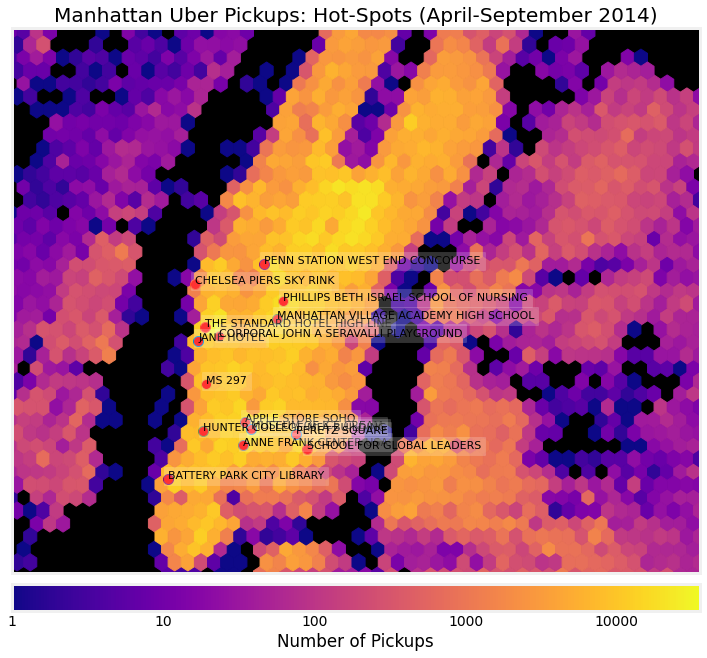

In [303]:
plt.figure(figsize=(14, 10)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")
plt.title('Manhattan Uber Pickups: Hot-Spots (April-September 2014)')

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top_m, llcrnrlat=bottom_m, llcrnrlon=left_m, urcrnrlon=right_m)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');

for i in range(0, len(locations_m)):
    x, y = map(locations_m['Lon'][i], locations_m['Lat'][i])
    plt.plot(x, y, marker='o', markerfacecolor='red', markersize=10)
    plt.text(x, y, locations_m['Name'][i], fontsize=11, color="black").set_bbox(dict(facecolor='white', alpha=0.2, edgecolor='white'));
    i+=1

## Hotspots in Brooklyn

In [370]:
#New values to zoom in Brooklyn
top_brook = 40.74
bottom_brook = 40.58
left_brook = -74.03
right_brook = -73.88

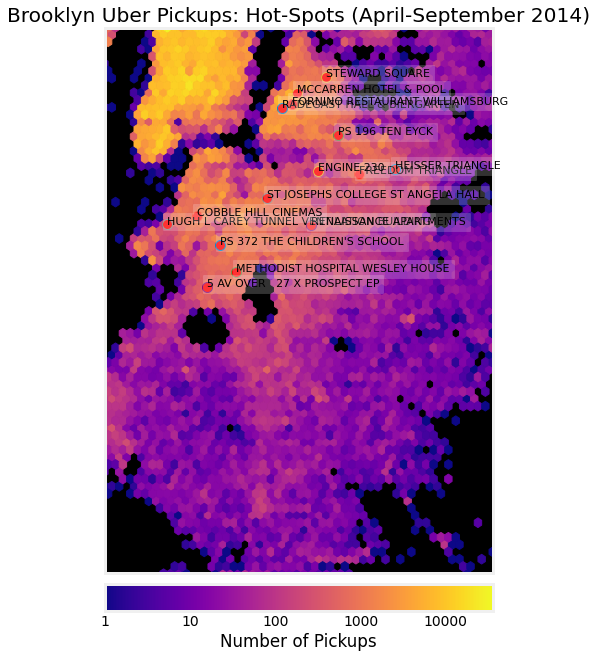

In [371]:
plt.figure(figsize=(14, 10)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")
plt.title('Brooklyn Uber Pickups: Hot-Spots (April-September 2014)')

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top_brook, llcrnrlat=bottom_brook, llcrnrlon=left_brook, urcrnrlon=right_brook)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');

for i in range(0,len(locations_brook)):
    x, y = map(locations_brook['Lon'][i], locations_brook['Lat'][i])
    plt.plot(x, y, marker='o', markerfacecolor='red', markersize=10)
    plt.text(x, y, locations_brook['Name'][i], fontsize=11, color="black").set_bbox(dict(facecolor='white', alpha=0.2, edgecolor='white'));
    i+=1

## Hotspots Bronx

In [350]:
#New values to zoom in Bronx
top_bronx = 40.91
bottom_bronx = 40.79
left_bronx = -73.95
right_bronx = -73.75

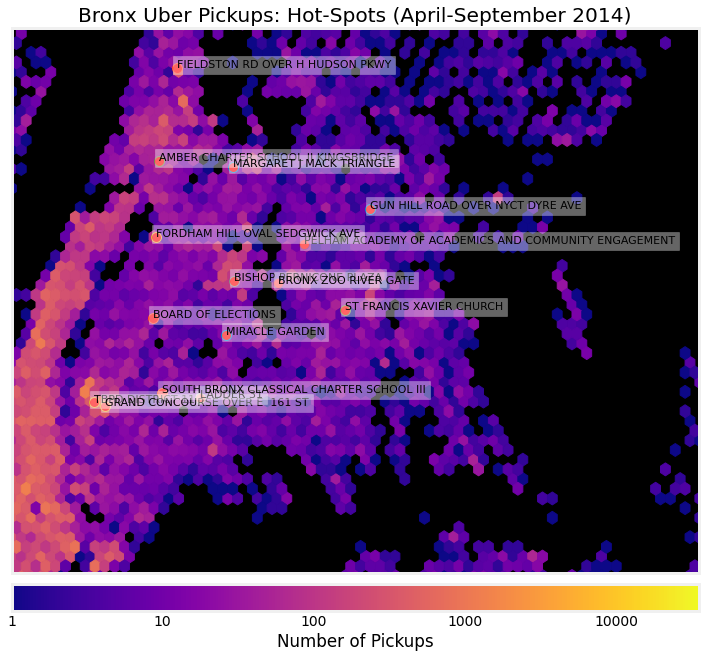

In [351]:
plt.figure(figsize=(14, 10)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")
plt.title('Bronx Uber Pickups: Hot-Spots (April-September 2014)')

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top_bronx, llcrnrlat=bottom_bronx, llcrnrlon=left_bronx, urcrnrlon=right_bronx)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');

for i in range(0,len(locations_bronx)):
    x, y = map(locations_bronx['Lon'][i], locations_bronx['Lat'][i])
    plt.plot(x, y, marker='o', markerfacecolor='red', markersize=10)
    plt.text(x, y, locations_bronx['Name'][i], fontsize=11, color="black").set_bbox(dict(facecolor='white', alpha=0.4, edgecolor='white'));
    i+=1

## Hotspots Queens

In [341]:
#New values to zoom in Queens
top_q = 40.8
bottom_q = 40.65
left_q = -74
right_q = -73.65

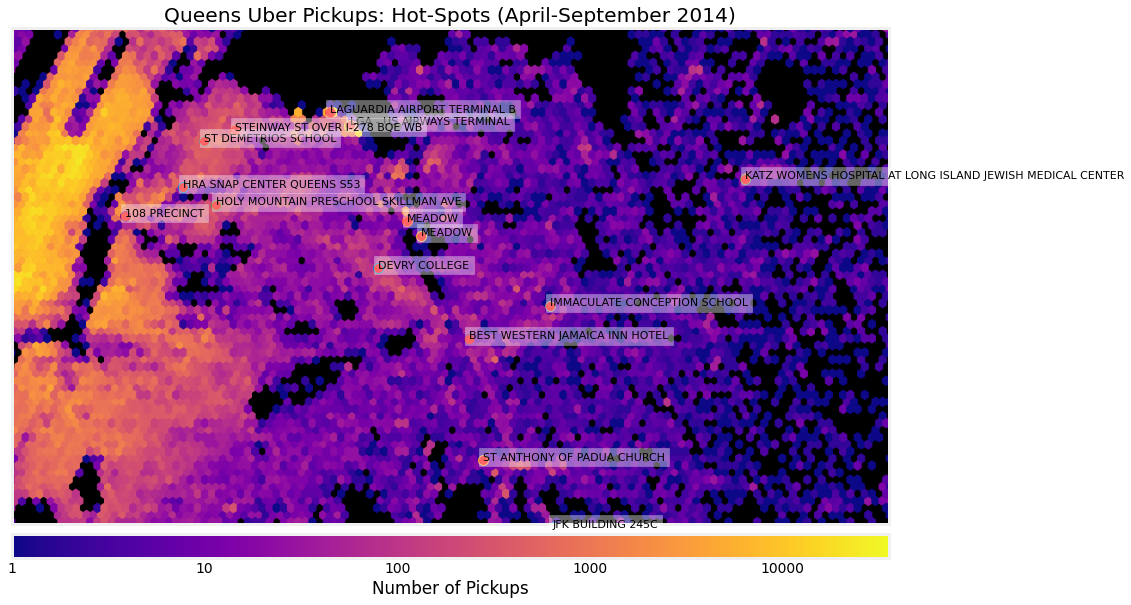

In [342]:
plt.figure(figsize=(14, 10)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")
plt.title('Queens Uber Pickups: Hot-Spots (April-September 2014)')

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top_q, llcrnrlat=bottom_q, llcrnrlon=left_q, urcrnrlon=right_q)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');

for i in range(0,len(locations_queens)):
    x, y = map(locations_queens['Lon'][i], locations_queens['Lat'][i])
    plt.plot(x, y, marker='o', markerfacecolor='red', markersize=10)
    plt.text(x, y, locations_queens['Name'][i], fontsize=11, color="black").set_bbox(dict(facecolor='white', alpha=0.4, edgecolor='white'));
    i+=1

## Hotspots Staten Island

In [343]:
#New values to zoom in staten island
top_s = 40.7
bottom_s = 40.55
left_s = -74.2
right_s = -74.05

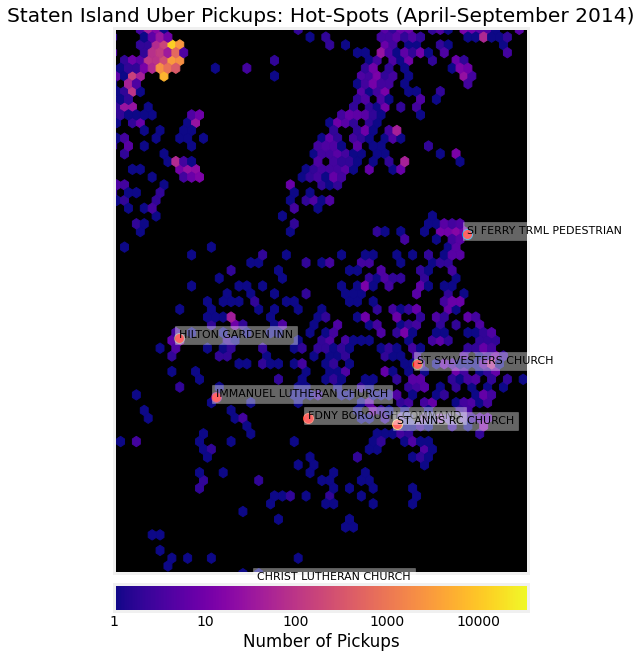

In [344]:
plt.figure(figsize=(14, 10)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")
plt.title('Staten Island Uber Pickups: Hot-Spots (April-September 2014)')

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top_s, llcrnrlat=bottom_s, llcrnrlon=left_s, urcrnrlon=right_s)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');

for i in range(0,len(locations_staten)):
    x, y = map(locations_staten['Lon'][i], locations_staten['Lat'][i])
    plt.plot(x, y, marker='o', markerfacecolor='red', markersize=10)
    plt.text(x, y, locations_staten['Name'][i], fontsize=11, color="black").set_bbox(dict(facecolor='white', alpha=0.4, edgecolor='white'));
    i+=1

## Number of pickups in NYC: Weekdays vs. Weekends

In [97]:
#Split Date and Time into different columns
rides14['Month'] = rides14['Date_time'].dt.month_name()
rides14['Weekday'] = rides14['Date_time'].dt.day_name()
rides14['Day'] = rides14['Date_time'].dt.day
rides14['Hour'] = rides14['Date_time'].dt.hour
rides14['Minute'] = rides14['Date_time'].dt.minute

In [98]:
rides14.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


 ### Weekdays (Mon-Fri)

In [137]:
#New values to zoom in a little bit
top = 40.85
bottom = 40.62
left = -74.2
right = -73.75

In [113]:
rides14_week = rides14[rides14['Weekday'].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])]

In [130]:
#Get Longitude and Latitude of the rides
Longitudes_week = rides14_week['Lon'].values
Latitudes_week  = rides14_week['Lat'].values

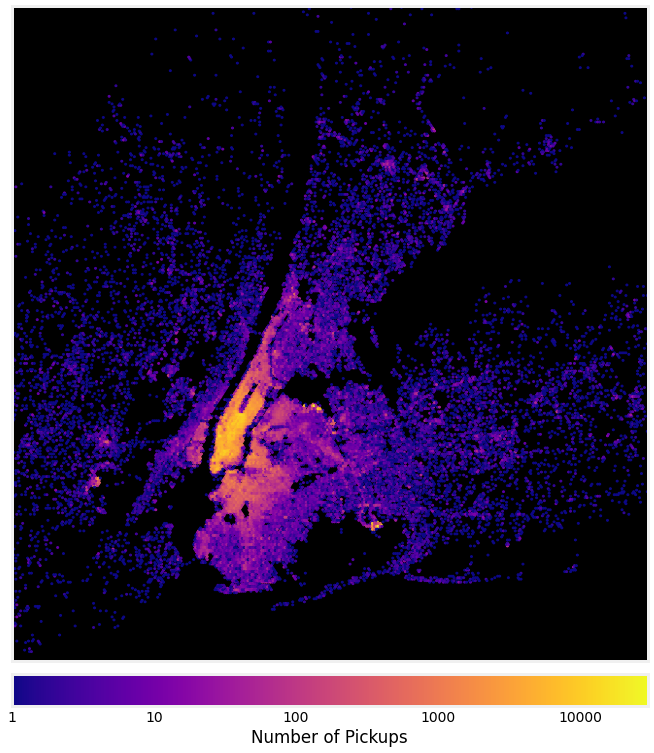

In [255]:
plt.figure(figsize=(16, 12)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes_week, Latitudes_week)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');

 ### Weekend (Sat-Sun)

In [116]:
rides14_weekend = rides14[rides14['Weekday'].isin(["Saturday", "Sunday"])]

In [131]:
#Get Longitude and Latitude of the rides
Longitudes_weekend = rides14_weekend['Lon'].values
Latitudes_weekend  = rides14_weekend['Lat'].values

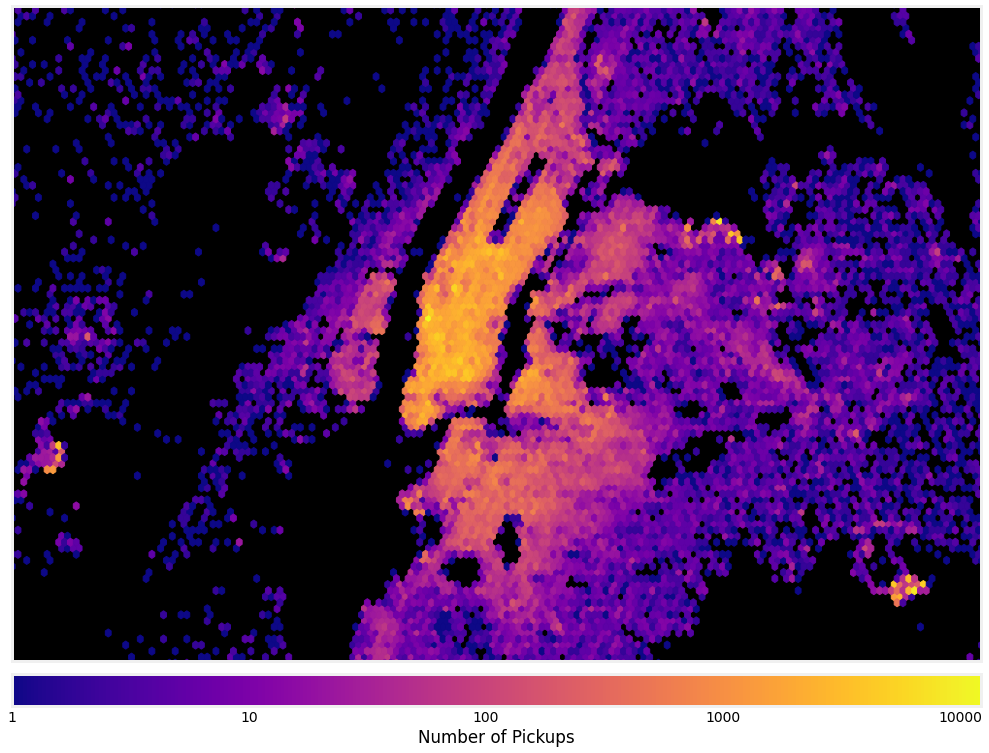

In [139]:
plt.figure(figsize=(16, 12)).patch.set_facecolor('white')
plt.axes().set_facecolor("black")

#Plot map with pickups counts
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes_weekend, Latitudes_weekend)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.plasma)
map.colorbar(location='bottom', format='%.0f', label='Number of Pickups');